In [1]:
import pandas as pd #library for data manipulation and analysis
import numpy as np #library for working with arrays
from sklearn.feature_extraction.text import TfidfVectorizer #package for toknaztion
from sklearn.model_selection import train_test_split #splits arrays into random train and test subsets.
from sklearn.tree import DecisionTreeClassifier #A decision tree classifier
from sklearn.naive_bayes import MultinomialNB #A naive bayes 
from sklearn.svm import LinearSVC #SVM
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [2]:
#Read dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
# print the head of dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# print the shape of dataset
df.shape

(100000, 9)

In [5]:
#print info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

In [7]:
# check missing values in each column
df.isna().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# print the number of duplicated rows and duplicated rows
num_duplicates = df.duplicated().sum()
print(f'The dataset contains {num_duplicates} duplicated rows.')
df[df.duplicated()]

The dataset contains 3854 duplicated rows.


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [9]:
# drop duplicated rows
df.drop_duplicates(inplace=True, keep='first')

In [10]:
# print the shape of dataset
df.shape

(96146, 9)

In [11]:
df['diabetes'].unique() # to check all classes for strength coloumn

array([0, 1])

In [12]:
df['gender'].unique() # to check all classes for strength coloumn

array(['Female', 'Male', 'Other'], dtype=object)

In [13]:
df['smoking_history'].unique() # to check all classes for strength coloumn

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [14]:
numerical_columns = [col for col in df.select_dtypes(['float', 'int']) if col not in ['heart_disease', 'hypertension', 'diabetes']]
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [15]:
# for col in categorical_columns:
#     print(f'{col:-<20} {df[col].unique()}')

In [16]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called "df"
rows_with_other_gender = df[df['gender'] == 'Other']
rows_with_other_gender

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [17]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called "df"
rows_with_other_gender = df[df['gender'] == 'Other']
num_rows_with_other_gender = len(rows_with_other_gender)
print("Number of rows with gender 'Other':", num_rows_with_other_gender)

Number of rows with gender 'Other': 18


In [18]:
df = df[df['gender'] != 'Other']

In [19]:
# print the shape of dataset
df.shape

(96128, 9)

In [20]:
# Create a dictionary to map the old values to new values
smoking_mapping = {
    'never': 'never',
    'No Info': 'No Info',
    'current': 'current',
    'former': 'past',
    'ever': 'never',
    'not current': 'past'
}

df['smoking_history'] = df['smoking_history'].map(smoking_mapping)
# print(df['smoking_history'])

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_18350/1537840143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].map(smoking_mapping)


In [21]:
df.shape

(96128, 9)

In [22]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [23]:
# for col in categorical_columns:
#     print(col)
#     print(df[col].value_counts())
#     print('-'*20)

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_18350/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

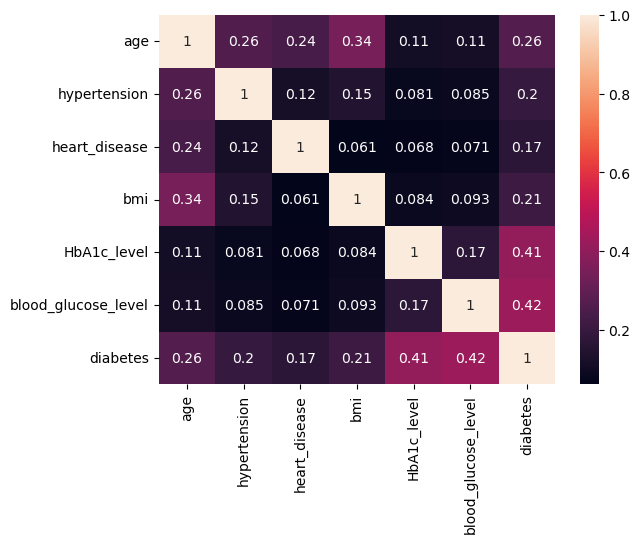

In [24]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

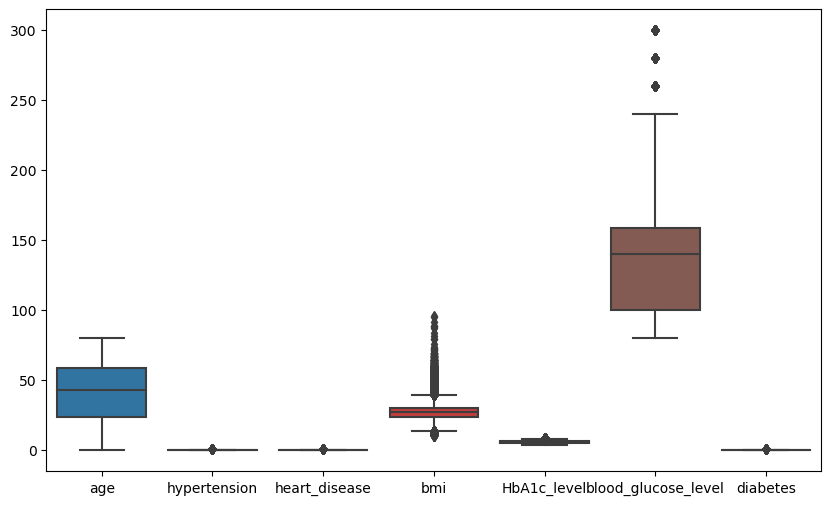

In [25]:
# boxplot for all datafream
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

<Axes: >

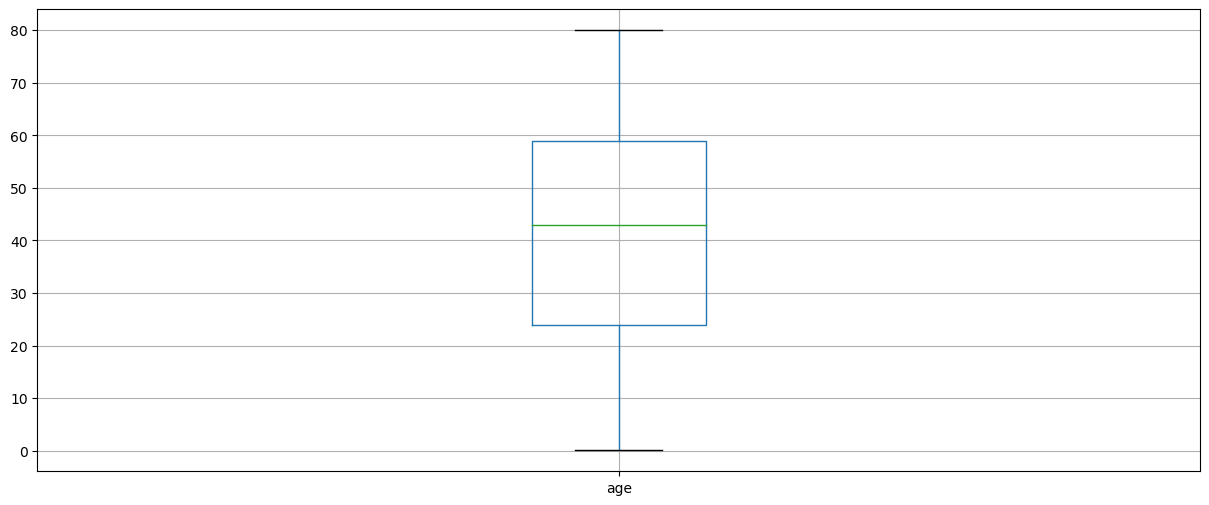

In [26]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['age'], figsize=(15, 6))

<Axes: >

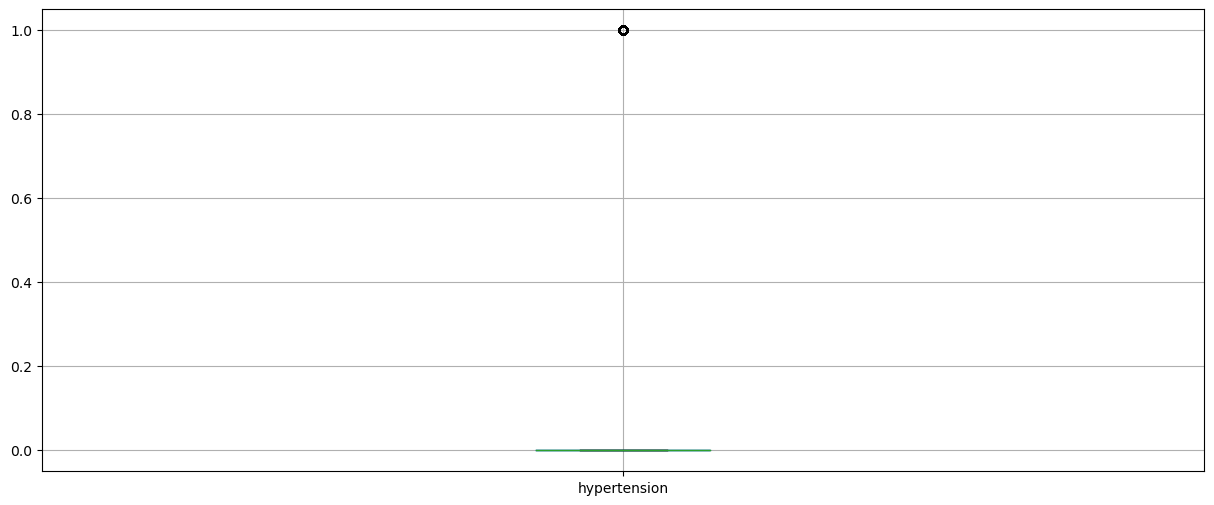

In [27]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['hypertension'], figsize=(15, 6))

<Axes: >

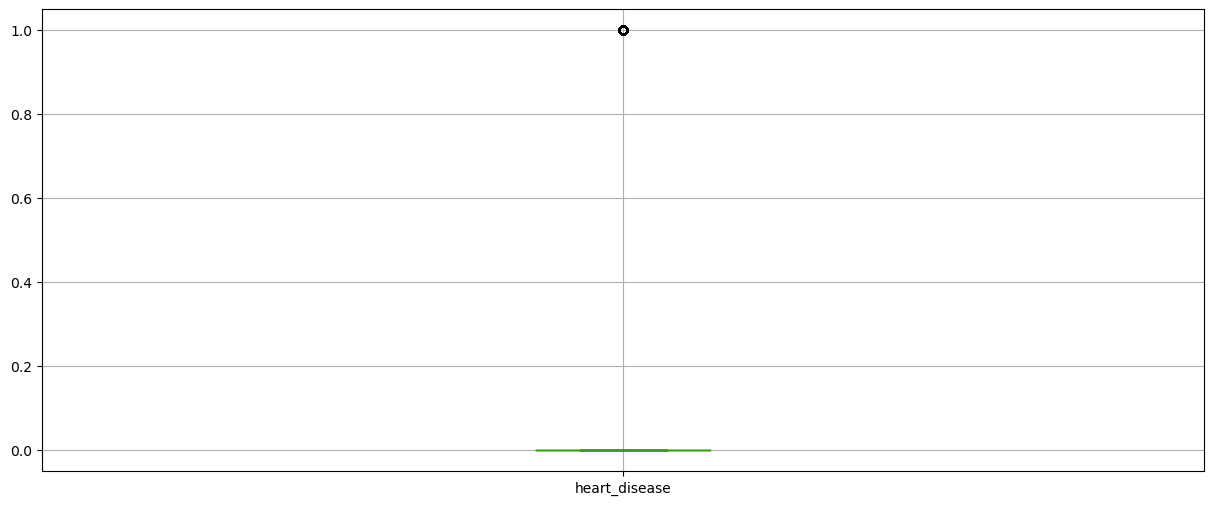

In [28]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['heart_disease'], figsize=(15, 6))

<Axes: >

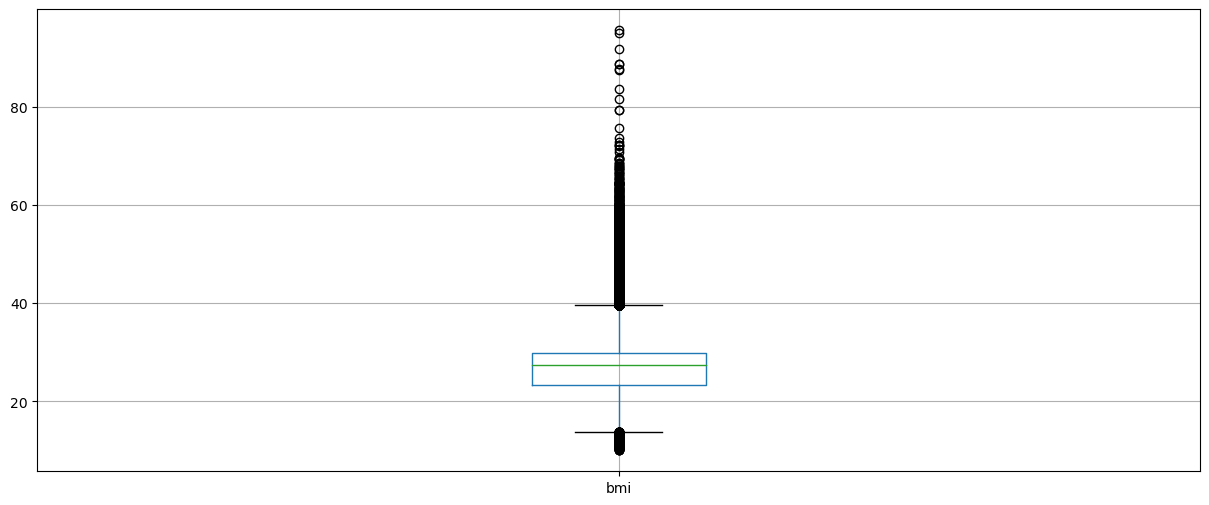

In [29]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['bmi'], figsize=(15, 6))

Lower bound outliers  13.709999999999997
Higher bound outliers 39.55


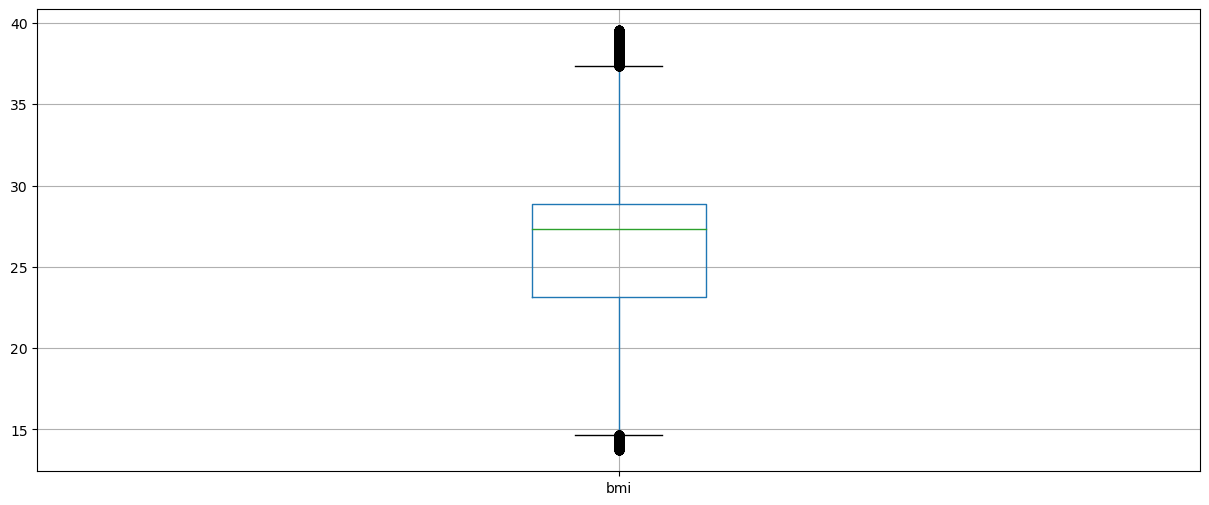

In [30]:
# drop the outliers
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Lower bound outliers ', lower_bound)
print('Higher bound outliers', upper_bound)
#Exluding outer layers 
df = df.drop(df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)].index)
df.boxplot(column=['bmi'], figsize=(15, 6))
plt.show();

<Axes: >

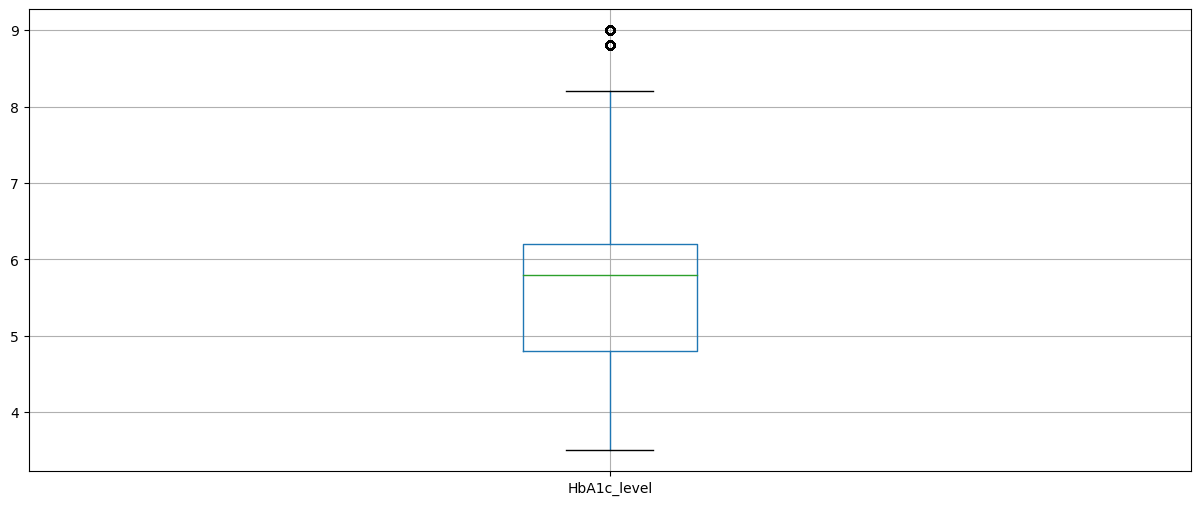

In [31]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['HbA1c_level'], figsize=(15, 6))

Lower bound outliers  2.6999999999999993
Higher bound outliers 8.3


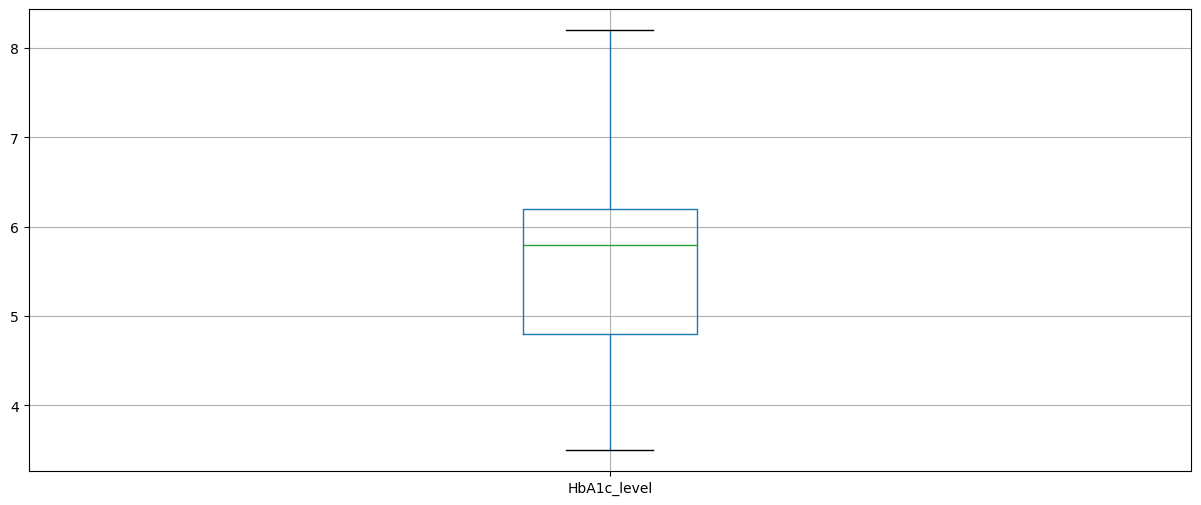

In [32]:
# drop the outliers
q1 = df['HbA1c_level'].quantile(0.25)
q3 = df['HbA1c_level'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Lower bound outliers ', lower_bound)
print('Higher bound outliers', upper_bound)
#Exluding outer layers 
df = df.drop(df[(df['HbA1c_level'] < lower_bound) | (df['HbA1c_level'] > upper_bound)].index)
df.boxplot(column=['HbA1c_level'], figsize=(15, 6))
plt.show();

<Axes: >

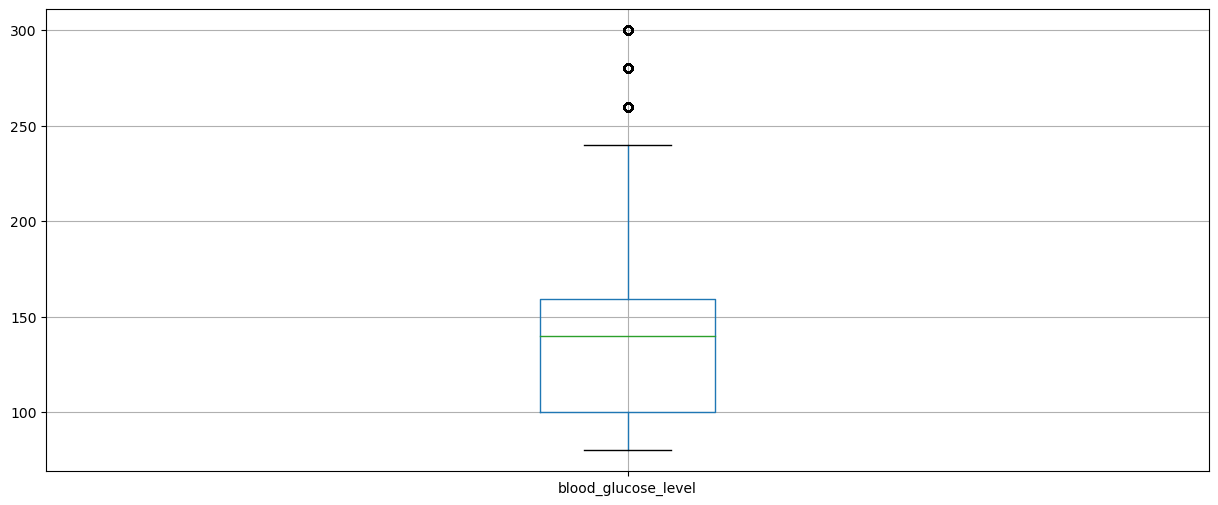

In [33]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['blood_glucose_level'], figsize=(15, 6))

Lower bound outliers  11.5
Higher bound outliers 247.5


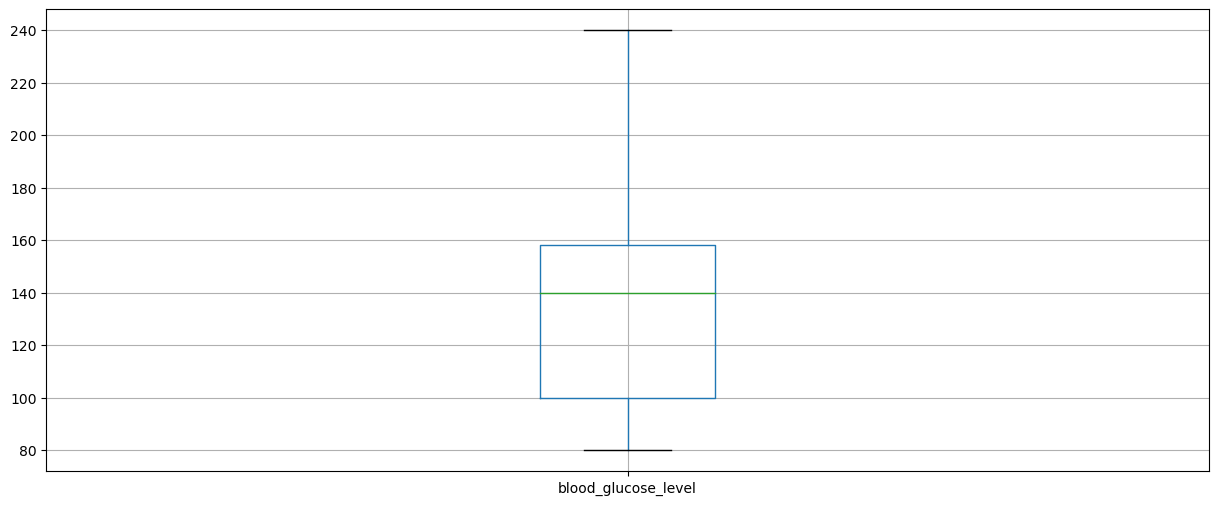

In [34]:
# drop the outliers
q1 = df['blood_glucose_level'].quantile(0.25)
q3 = df['blood_glucose_level'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Lower bound outliers ', lower_bound)
print('Higher bound outliers', upper_bound)
#Exluding outer layers 
df = df.drop(df[(df['blood_glucose_level'] < lower_bound) | (df['blood_glucose_level'] > upper_bound)].index)
df.boxplot(column=['blood_glucose_level'], figsize=(15, 6))
plt.show();

<Axes: >

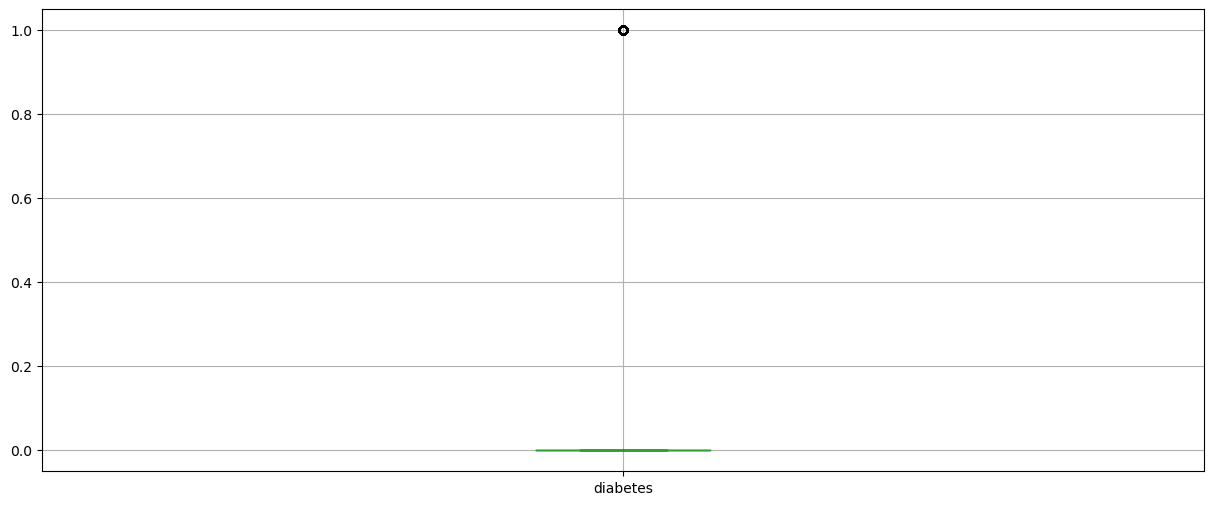

In [35]:
# boxplot for PRCP column befor drop the outliers
df.boxplot(column=['diabetes'], figsize=(15, 6))

In [36]:
df.shape

(88177, 9)

In [37]:
# Encodage des variables catégorielles
def labelencoder(col):
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    return df[col]
for col in ['gender', 'smoking_history']:
    df[col] = labelencoder(col)

In [38]:
for col in categorical_columns:
    print(f'{col:-<20} {df[col].unique()}')

gender-------------- [0 1]
hypertension-------- [0 1]
heart_disease------- [1 0]
smoking_history----- [2 0 1 3]
diabetes------------ [0 1]


In [39]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,2,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [40]:
y = df['diabetes']
x = df.drop('diabetes', axis=1)

In [41]:
print(x.shape)
print(y.shape)

(88177, 8)
(88177,)


In [42]:
# splitting dataset to 70% training and 30% testing
A_training, A_testing, B_training, B_testing = train_test_split(x, y, test_size=0.3)#splitting function 

In [43]:
print("Training set has {} samples.".format(A_training.shape[0]))
print("Testing set has {} samples.".format(A_testing.shape[0]))

Training set has 61723 samples.
Testing set has 26454 samples.


In [44]:
#build our model using DecisionTreeClassifier algorithm
DT_clf=DecisionTreeClassifier() #initialize algorithm
DT_clf.fit(A_training, B_training) #fit the algorithm onto the train set dataset

DecisionTreeClassifier()

In [45]:
#Evaluation of Decision Tree algorithm
DT_pred = DT_clf.predict(A_testing)
DT_acc = metrics.accuracy_score(B_testing,DT_pred)
DT_precision = precision_score(B_testing, DT_pred , average="weighted")
DT_recall = recall_score(B_testing, DT_pred , average="weighted")
DT_f1 = f1_score(B_testing, DT_pred , average="weighted")
print('\nDecision Tree')
print('Accuracy Score: {}'.format(DT_acc))
print('Precision Score: {}'.format(DT_precision))
print('Recall Score: {}'.format(DT_recall))
print('F-1 Score: {}'.format(DT_f1))


Decision Tree
Accuracy Score: 0.9497618507598095
Precision Score: 0.953229115066014
Recall Score: 0.9497618507598095
F-1 Score: 0.9513476142562777


In [46]:
#build our model using Naive Bayes algorithm
NB = MultinomialNB()#initialize algorithm
NB.fit(A_training, B_training) #fit the algorithm onto the train set dataset

MultinomialNB()

In [47]:
#Evaluation of Naive Bayes algorithm
NB_pred = NB.predict(A_testing)
NB_acc = metrics.accuracy_score(B_testing,NB_pred)
NB_precision = precision_score(B_testing, NB_pred , average="weighted")
NB_recall = recall_score(B_testing, NB_pred , average="weighted")
NB_f1 = f1_score(B_testing, NB_pred , average="weighted")
print('\nNaive Bayes')
print('Accuracy Score: {}'.format(NB_acc))
print('Precision Score: {}'.format(NB_precision))
print('Recall Score: {}'.format(NB_recall))
print('F-1 Score: {}'.format(NB_f1))


Naive Bayes
Accuracy Score: 0.791222499432978
Precision Score: 0.9129228845789521
Recall Score: 0.791222499432978
F-1 Score: 0.8425954479872865


In [48]:
#build our model using SVM algorithm
SVM = LinearSVC() #initialize algorithm
SVM.fit(A_training, B_training) #fit the algorithm onto the train set dataset

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [49]:
#Evaluation of SVM
Support_pred = SVM.predict(A_testing)
svm_acc = metrics.accuracy_score(B_testing,Support_pred)
svm_precision = precision_score(B_testing, Support_pred , average="weighted")
svm_recall = recall_score(B_testing, Support_pred , average="weighted")
svm_f1 = f1_score(B_testing, Support_pred , average="weighted")
print('\nSupport Vector Machine')
print('Accuracy Score: {}'.format(svm_acc))
print('Precision Score: {}'.format(svm_precision))
print('Recall Score: {}'.format(svm_recall))
print('F-1 Score: {}'.format(svm_f1))


Support Vector Machine
Accuracy Score: 0.9603084599682468
Precision Score: 0.9576055428373139
Recall Score: 0.9603084599682468
F-1 Score: 0.9504741894002504


In [50]:
#build our model using Logistic Regression algorithm
LR=LogisticRegression(multi_class='multinomial', solver='sag')# SAGA solver used because we have very Large dataset.
LR.fit(A_training, B_training) #fit the algorithm onto the train set dataset

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [51]:
#Evaluation of Logistic Regression algorithm
LR_pred = LR.predict(A_testing)
LR_acc = metrics.accuracy_score(B_testing,LR_pred)
LR_precision = precision_score(B_testing, LR_pred , average="weighted")
LR_recall = recall_score(B_testing, LR_pred , average="weighted")
LR_f1 = f1_score(B_testing, LR_pred , average="weighted")
print('\nLogistic Regression')
print('Accuracy Score: {}'.format(LR_acc))
print('Precision Score: {}'.format(LR_precision))
print('Recall Score: {}'.format(LR_recall))
print('F-1 Score: {}'.format(LR_f1))


Logistic Regression
Accuracy Score: 0.9483631964920239
Precision Score: 0.9358029908820459
Recall Score: 0.9483631964920239
F-1 Score: 0.9258734019601127


In [52]:
#build our model using RandomForestClassifier algorithm
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 4)  #initialize algorithm
rfc.fit(A_training, B_training) #fit the algorithm onto the train set dataset

RandomForestClassifier(max_depth=4, n_estimators=20)

In [53]:
#Evaluation of RandomForestClassifier algorithm
RFC_pred = rfc.predict(A_testing)
RFC_acc = metrics.accuracy_score(B_testing,RFC_pred)
RFC_precision = precision_score(B_testing, RFC_pred , average="weighted")
RFC_recall = recall_score(B_testing, RFC_pred , average="weighted")
RFC_f1 = f1_score(B_testing, RFC_pred , average="weighted")
print('\nRandom Forest Classifier')
print('Accuracy Score: {}'.format(RFC_acc))
print('Precision Score: {}'.format(RFC_precision))
print('Recall Score: {}'.format(RFC_recall))
print('F-1 Score: {}'.format(RFC_f1))


Random Forest Classifier
Accuracy Score: 0.9731231571784985
Precision Score: 0.9738647239931242
Recall Score: 0.9731231571784985
F-1 Score: 0.9687197354230327


In [54]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     "n_estimators": [10,20,30], 
#     "criterion": ["gini", "entropy"],
#     "max_depth": [2,4,6] 
    
# }
# grid = GridSearchCV(rfc, param_grid, cv = 5, n_jobs=-1, verbose=1)
# grid.fit(A_training, B_training)

In [55]:
# grid_df = pd.DataFrame(grid.cv_results_)
# grid_df

In [56]:
# # Find the best parameters of 
# best_params = grid.best_params_
# print("Best Parameters:", best_params)
# best_estimator = grid.best_estimator_
# print("Best Estimator:", best_estimator)
# best_score = grid.best_score_
# print("Best Score:", best_score)

  Evaluation Metrics  Decision Tree  Multinomial NB       SVM  Logistic Regression  Random Forest
0           Accuracy       0.949762        0.791222  0.960308             0.948363       0.973123
1          Precision       0.953229        0.912923  0.957606             0.935803       0.973865
2             Recall       0.949762        0.791222  0.960308             0.948363       0.973123
3           F1-score       0.951348        0.842595  0.950474             0.925873       0.968720


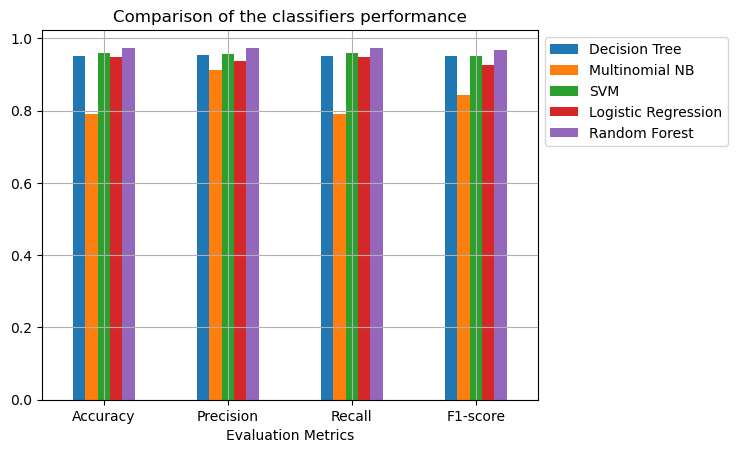

In [57]:
#create a dataframe of evaluation metrics
df = pd.DataFrame([['Accuracy', DT_acc, NB_acc, svm_acc, LR_acc,RFC_acc ], ['Precision', DT_precision, NB_precision, svm_precision, LR_precision,RFC_precision ], ['Recall', DT_recall, NB_recall, svm_recall, LR_recall, RFC_recall],
                   ['F1-score', DT_f1, NB_f1, svm_f1, LR_f1, RFC_f1]],
                  columns=['Evaluation Metrics', 'Decision Tree', 'Multinomial NB', 'SVM', 'Logistic Regression', 'Random Forest'])
pd.set_option('display.expand_frame_repr', False)
#view data
print(df)
#plot grouped bar chart
df.plot(x='Evaluation Metrics',
        kind='bar',
        stacked=False,
        title='Comparison of the classifiers performance', rot=0, grid=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [58]:
#SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(sampling_strategy="minority")
x_res, y_res = sm.fit_resample(A_training, B_training)

print('original dataset shape:', Counter(B_training))
print('Resample dataset shape', Counter(y_res))

original dataset shape: Counter({0: 58501, 1: 3222})
Resample dataset shape Counter({0: 58501, 1: 58501})


In [59]:
#build our model using DecisionTreeClassifier algorithm after smote
DT_clf=DecisionTreeClassifier() #initialize algorithm
DT_clf.fit(x_res, y_res) #fit the algorithm onto the train set dataset

DecisionTreeClassifier()

In [60]:
#Evaluation of Decision Tree algorithm after smote
DT_pred = DT_clf.predict(A_testing)
DT_acc = metrics.accuracy_score(B_testing,DT_pred)
DT_precision = precision_score(B_testing, DT_pred , average="weighted")
DT_recall = recall_score(B_testing, DT_pred , average="weighted")
DT_f1 = f1_score(B_testing, DT_pred , average="weighted")
print('\nDecision Tree')
print('Accuracy Score: {}'.format(DT_acc))
print('Precision Score: {}'.format(DT_precision))
print('Recall Score: {}'.format(DT_recall))
print('F-1 Score: {}'.format(DT_f1))


Decision Tree
Accuracy Score: 0.9500264610266879
Precision Score: 0.9536350995375226
Recall Score: 0.9500264610266879
F-1 Score: 0.9516692275193692


In [61]:
#build our model using Naive Bayes algorithm after smote
NB = MultinomialNB()#initialize algorithm
NB.fit(x_res, y_res) #fit the algorithm onto the train set dataset

MultinomialNB()

In [62]:
#Evaluation of Naive Bayes algorithm after smote
NB_pred = NB.predict(A_testing)
NB_acc = metrics.accuracy_score(B_testing,NB_pred)
NB_precision = precision_score(B_testing, NB_pred , average="weighted")
NB_recall = recall_score(B_testing, NB_pred , average="weighted")
NB_f1 = f1_score(B_testing, NB_pred , average="weighted")
print('\nNaive Bayes')
print('Accuracy Score: {}'.format(NB_acc))
print('Precision Score: {}'.format(NB_precision))
print('Recall Score: {}'.format(NB_recall))
print('F-1 Score: {}'.format(NB_f1))


Naive Bayes
Accuracy Score: 0.6027065850154986
Precision Score: 0.9254712134643583
Recall Score: 0.6027065850154986
F-1 Score: 0.7094000945567487


In [63]:
#build our model using SVM algorithm after smote
SVM = LinearSVC() #initialize algorithm
SVM.fit(x_res, y_res) #fit the algorithm onto the train set dataset

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [64]:
#Evaluation of SVM after smote
Support_pred = SVM.predict(A_testing)
svm_acc = metrics.accuracy_score(B_testing,Support_pred)
svm_precision = precision_score(B_testing, Support_pred , average="weighted")
svm_recall = recall_score(B_testing, Support_pred , average="weighted")
svm_f1 = f1_score(B_testing, Support_pred , average="weighted")
print('\nSupport Vector Machine')
print('Accuracy Score: {}'.format(svm_acc))
print('Precision Score: {}'.format(svm_precision))
print('Recall Score: {}'.format(svm_recall))
print('F-1 Score: {}'.format(svm_f1))


Support Vector Machine
Accuracy Score: 0.8583579042866863
Precision Score: 0.9483375017712414
Recall Score: 0.8583579042866863
F-1 Score: 0.8913607425671404


In [65]:
#build our model using Logistic Regression algorithm after smote
LR=LogisticRegression(multi_class='multinomial', solver='sag')# SAGA solver used because we have very Large dataset.
LR.fit(x_res, y_res) #fit the algorithm onto the train set dataset

/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [66]:
#Evaluation of Logistic Regression algorithm after smote
LR_pred = LR.predict(A_testing)
LR_acc = metrics.accuracy_score(B_testing,LR_pred)
LR_precision = precision_score(B_testing, LR_pred , average="weighted")
LR_recall = recall_score(B_testing, LR_pred , average="weighted")
LR_f1 = f1_score(B_testing, LR_pred , average="weighted")
print('\nLogistic Regression')
print('Accuracy Score: {}'.format(LR_acc))
print('Precision Score: {}'.format(LR_precision))
print('Recall Score: {}'.format(LR_recall))
print('F-1 Score: {}'.format(LR_f1))


Logistic Regression
Accuracy Score: 0.8321614878657292
Precision Score: 0.9495778372637005
Recall Score: 0.8321614878657292
F-1 Score: 0.8743972642505323


In [67]:
#build our model using RandomForestClassifier algorithm
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth = 6)  #initialize algorithm
rfc.fit(x_res, y_res) #fit the algorithm onto the train set dataset

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=20)

In [68]:
#Evaluation of RandomForestClassifier algorithm
RFC_pred = rfc.predict(A_testing)
RFC_acc = metrics.accuracy_score(B_testing,RFC_pred)
RFC_precision = precision_score(B_testing, RFC_pred , average="weighted")
RFC_recall = recall_score(B_testing, RFC_pred , average="weighted")
RFC_f1 = f1_score(B_testing, RFC_pred , average="weighted")
print('\nRandom Forest Classifier')
print('Accuracy Score: {}'.format(RFC_acc))
print('Precision Score: {}'.format(RFC_precision))
print('Recall Score: {}'.format(RFC_recall))
print('F-1 Score: {}'.format(RFC_f1))


Random Forest Classifier
Accuracy Score: 0.834694186134422
Precision Score: 0.9520833379909573
Recall Score: 0.834694186134422
F-1 Score: 0.8763732841377957


In [69]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [10,20,30], 
#     "criterion": ["gini", "entropy"],
#     "max_depth": [2,4,6] 
    
# }
# grid = GridSearchCV(rfc, param_grid, cv = 5, n_jobs=-1, verbose=1)
# grid.fit(x_res, y_res)

In [70]:
# grid_df = pd.DataFrame(grid.cv_results_)
# grid_df

In [71]:
# # Find the best parameters of 
# best_params = grid.best_params_
# print("Best Parameters:", best_params)
# best_estimator = grid.best_estimator_
# print("Best Estimator:", best_estimator)
# best_score = grid.best_score_
# print("Best Score:", best_score)

  Evaluation Metrics  Decision Tree  Multinomial NB       SVM  Logistic Regression  Random Forest
0           Accuracy       0.950026        0.602707  0.858358             0.832161       0.834694
1          Precision       0.953635        0.925471  0.948338             0.949578       0.952083
2             Recall       0.950026        0.602707  0.858358             0.832161       0.834694
3           F1-score       0.951669        0.709400  0.891361             0.874397       0.876373


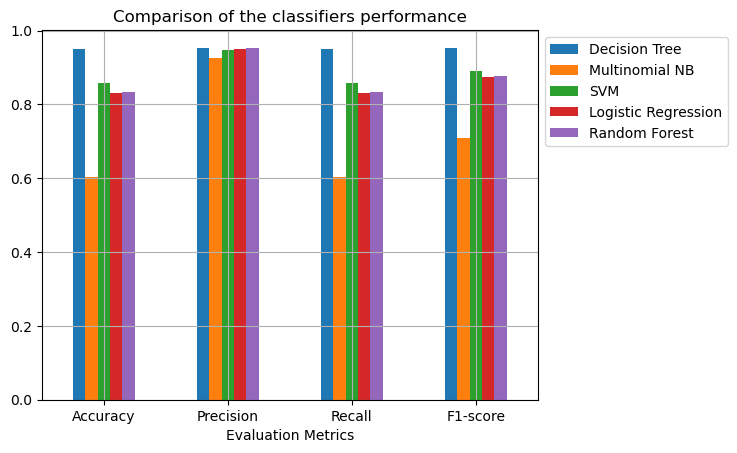

In [72]:
#create a dataframe of evaluation metrics
df = pd.DataFrame([['Accuracy', DT_acc, NB_acc, svm_acc, LR_acc,RFC_acc ], ['Precision', DT_precision, NB_precision, svm_precision, LR_precision,RFC_precision ], ['Recall', DT_recall, NB_recall, svm_recall, LR_recall, RFC_recall],
                   ['F1-score', DT_f1, NB_f1, svm_f1, LR_f1, RFC_f1]],
                  columns=['Evaluation Metrics', 'Decision Tree', 'Multinomial NB', 'SVM', 'Logistic Regression', 'Random Forest'])
pd.set_option('display.expand_frame_repr', False)
#view data
print(df)
#plot grouped bar chart
df.plot(x='Evaluation Metrics',
        kind='bar',
        stacked=False,
        title='Comparison of the classifiers performance', rot=0, grid=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [73]:
# interface
import pandas as pd
from gradio import gradio as gr
from gradio import components as gr_comp

def labelencoder(column, df):
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    return df[column]

def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    # Preprocess user input
    user_input = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [0 if hypertension == "No" else 1],
        'heart_disease': [0 if heart_disease == "No" else 1],
        'smoking_history': [smoking_history],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    # Encode the categorical variables
    user_input['gender'] = labelencoder('gender', user_input)
    user_input['smoking_history'] = labelencoder('smoking_history', user_input)

    # Make the prediction
    diabetes_prediction = DT_clf.predict(user_input)

    # Return the prediction
    if diabetes_prediction[0] == 1:
        return "The patient is predicted to have diabetes ❌."
    else:
        return "The patient is predicted to not have diabetes ✅."

# Create the input components for Gradio
gender_input = gr_comp.Dropdown(["Male", "Female"], label="Gender")
age_input = gr_comp.Number(label="Age")
hypertension_input = gr_comp.Dropdown(["No", "Yes"], label="Hypertension")
heart_disease_input = gr_comp.Dropdown(["No", "Yes"], label="Heart Disease")
smoking_history_input = gr_comp.Dropdown(["never", "past", "current"], label="Smoking History")
bmi_input = gr_comp.Number(label="BMI")
hba1c_level_input = gr_comp.Number(label="HbA1c Level")
blood_glucose_level_input = gr_comp.Number(label="Blood Glucose Level")

# Create the output component for Gradio
output_text = gr_comp.Textbox(label="Diabetes Prediction")

# Create the interface using Gradio
interface = gr.Interface(fn=predict_diabetes,
                         inputs=[gender_input, age_input, hypertension_input, heart_disease_input,
                                 smoking_history_input, bmi_input, hba1c_level_input,
                                 blood_glucose_level_input],
                         outputs=output_text,
                         title="Diabetes Prediction 👩🏻‍⚕️",
                         description="Enter the patient's information to predict diabetes:")

# Run the interface
interface.launch()

/Users/mac/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
